In [2]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
from models import mesc_sep_dict
import nibabel.processing

from tqdm import trange
from keras.models import load_model



from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session

import matplotlib.pyplot as plt

In [6]:
scales = np.loadtxt('E:\MESC-Net_Sep_Dict-master\output_directory\scales.txt')

dwi_nii = nib.load("E:\HCP_25_dataset (1)\HCP_25_dataset\HCD1462548_V1_MR\data_new.nii.gz")
dwi = dwi_nii.get_fdata()
mask_nii = nib.load('E:/HCP_25_dataset (1)/HCP_25_dataset/HCD1462548_V1_MR/nodif_brain_mask.nii.gz')
mask = mask_nii.get_fdata()
dwiTest, patchCornerList = load_test_matrix(
    dwi, mask, 1, 3, 1
)
regressor = load_model("E:\MESC-Net_Sep_Dict-master\output_directory\mesc_sep_dict_regressor.h5")
featureList = regressor.predict(dwiTest[:, :, :])

features = data_combine_matrix(
    featureList, mask.shape,1, 1, patchCornerList, scales
)

mask_upsampled_nii = nibabel.processing.resample_to_output(
    mask_nii,
    (
        mask_nii.header.get_zooms()[0] / 1,
        mask_nii.header.get_zooms()[1] / 1,
        mask_nii.header.get_zooms()[2] / 1,
    ),
)

hdr = dwi_nii.header
hdr.set_qform(mask_upsampled_nii.header.get_qform())
for feature_index in range(3):
    feature_nii = nib.Nifti1Image(
        features[:, :, :, feature_index], hdr.get_base_affine(), hdr
    )
    feature_name = os.path.join(
        
        "MESC_sep_dict_feature_"
        + "%02d" % feature_index
        + "_sub_"
        + ".nii.gz",
    )
    feature_nii.to_filename(feature_name)

14206/14206 [==============================] - 259s 18ms/step


加载医学图像类型为<class 'nibabel.nifti1.Nifti1Image'>
浮点图像数据类型为<class 'numpy.ndarray'>
图像数据形状为(145, 174, 145)
0.6493412852287292


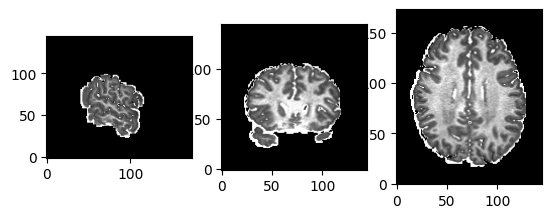

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

epi_index = nib.load(
    r"D:\dataset\HCP_25_dataset\100206\NODDI\fit_NDI.nii.gz"
)
print("加载医学图像类型为{}".format(type(epi_index)))
epi_index_data = epi_index.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_index_data)))
print("图像数据形状为{}".format(epi_index_data.shape))

slice_0 = epi_index_data[120, :, :]
slice_1 = epi_index_data[:, 120, :]
slice_2 = epi_index_data[:, :, 77]
show_slices([slice_0, slice_1, slice_2])
print(epi_index_data[50,70,70])

加载医学图像类型为<class 'nibabel.nifti1.Nifti1Image'>
浮点图像数据类型为<class 'numpy.ndarray'>
图像数据形状为(145, 174, 145)
0.90457124710083


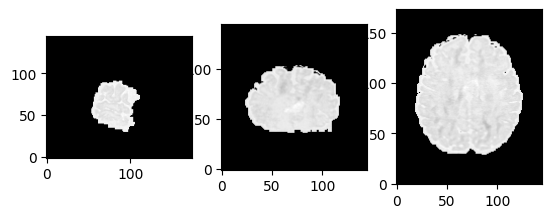

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

epi_index = nib.load(
    r"/data2/mayupeng/my_code/output_directory1/MESC_sep_dict_feature_00_sub_00.nii.gz"
)
print("加载医学图像类型为{}".format(type(epi_index)))
epi_index_data = epi_index.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_index_data)))
print("图像数据形状为{}".format(epi_index_data.shape))

slice_0 = epi_index_data[120, :, :]
slice_1 = epi_index_data[:, 120, :]
slice_2 = epi_index_data[:, :, 77]
show_slices([slice_0, slice_1, slice_2])
print(epi_index_data[50,70,70])

In [7]:
import os

# 指定 subject.txt 文件的路径和新文件夹的路径
subject_file = 'E:/HCP_25_dataset (1)/HCP_25_dataset/Subjectlist.txt'
base_folder = 'E:/HCP_25_dataset (1)/HCP_25'

# 读取 subject.txt 文件以获取文件夹名称
with open(subject_file, 'r') as file:
    subjects = file.readlines()
    subjects = [line.strip() for line in subjects]

# 循环遍历每个 subject 文件夹
for subject in subjects:
    subject_path = os.path.join('E:/HCP_25_dataset (1)/HCP_25_dataset', subject)
    new_subject_folder = os.path.join(base_folder, subject + '_V1_MR')

    # 确保每个 subject 的新文件夹存在
    if not os.path.exists(new_subject_folder):
        os.makedirs(new_subject_folder)

    # 检查 dti.bval 和 dti.bvec 文件是否存在
    bval_file = os.path.join(subject_path, 'dti.bval')
    bvec_file = os.path.join(subject_path, 'dti.bvec')

    # 如果这些文件存在，将它们复制到相应的新文件夹
    if os.path.exists(bval_file) and os.path.exists(bvec_file):
        os.system(f'copy "{bval_file}" "{new_subject_folder}/dti.bval"')
        os.system(f'copy "{bvec_file}" "{new_subject_folder}/dti.bvec"')


加载医学图像类型为<class 'nibabel.nifti1.Nifti1Image'>
浮点图像数据类型为<class 'numpy.ndarray'>
图像数据形状为(140, 140, 92, 60)
0.9977021228798051


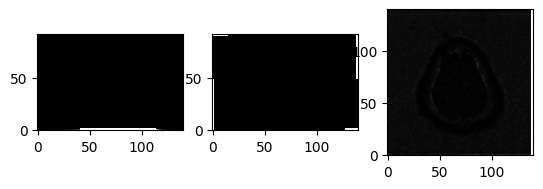

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt


epi_img = nib.load(
    "E:\HCP_25_dataset (1)\HCP_25_dataset\HCD1462548_V1_MR\data_final.nii.gz"
)
print("加载医学图像类型为{}".format(type(epi_img)))
epi_img_data = epi_img.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_img_data)))
print("图像数据形状为{}".format(epi_img_data.shape))
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
slice_0 = epi_img_data[120, :, :, 4]
slice_1 = epi_img_data[:, 120, :, 4]
slice_2 = epi_img_data[:, :, 77, 4]
show_slices([slice_0, slice_1, slice_2])
print(epi_img_data[120,120,77,4])

In [36]:
import torch
import torch.nn as nn


class ThresholdedReLU(nn.Module):
    def __init__(self, theta=0.01):
        super(ThresholdedReLU, self).__init__()
        self.theta = theta

    def forward(self, x):
        return torch.max(x, torch.tensor(self.theta).to(x.device))


class MESC_Sep_Dict(nn.Module):
    def __init__(
        self,
        input_shape=[60, 3 * 3 * 3],
        output_shape=[3, 1 * 1 * 1],
        nDictQ=300,
        nDictS=300,
    ):
        super(MESC_Sep_Dict, self).__init__()
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.nDictQ = nDictQ
        self.nDictS = nDictS

        self.nLayers1 = 8
        self.nLayers2 = 3
        self.ReLUThres = 0.01

        self.nChannelsQ = 75
        self.nChannelsS = 75

        # 定义全连接层
        self.Ws = nn.Linear(self.input_shape[1], self.nDictS)
        self.Wq = nn.Linear(self.input_shape[0], self.nDictQ)
        self.Wfs = nn.Linear(self.input_shape[1], self.nDictS)
        self.Wfq = nn.Linear(self.input_shape[0], self.nDictQ)
        self.Wis = nn.Linear(self.input_shape[1], self.nDictS)
        self.Wiq = nn.Linear(self.input_shape[0], self.nDictQ)

        # 定义 W_fx, W_ix, 和 S 的层
        self.W_fx_1 = nn.Linear(self.nDictS, self.nDictS)
        self.W_fx_2 = nn.Linear(self.nDictQ, self.nDictQ)
        self.W_ix_1 = nn.Linear(self.nDictS, self.nDictS)
        self.W_ix_2 = nn.Linear(self.nDictQ, self.nDictQ)
        self.S_1 = nn.Linear(self.nDictS, self.nDictS)
        self.S_2 = nn.Linear(self.nDictQ, self.nDictQ)

        # 初始化 H 模型的层
        self.H_layers = nn.ModuleList()
        self.H_layers.append(nn.Linear(self.nDictS, self.nChannelsS))
        self.H_layers.append(nn.Linear(self.nDictQ, self.nChannelsQ))
        for i in range(self.nLayers2 - 1):
            self.H_layers.append(nn.Linear(self.nChannelsS, self.nChannelsS))
            self.H_layers.append(nn.Linear(self.nChannelsQ, self.nChannelsQ))
        self.H_layers.append(nn.Linear(self.nChannelsS, self.output_shape[1]))
        self.H_layers.append(nn.Linear(self.nChannelsQ, self.output_shape[0]))

    def forward(self, x):
        # 实现前向传播逻辑
        Ws_output = self.permute(self.Ws(x))
        Wq_output = self.permute(self.Wq(Ws_output))
        Wfs_output = self.permute(self.Wfs(x))
        Wfq_output = self.permute(self.Wfq(Wfs_output))
        Wis_output = self.permute(self.Wis(x))
        Wiq_output = self.permute(self.Wiq(Wis_output))

        # ... 后续操作 ...
        Ctilde = Wq_output

        I = torch.sigmoid(Wiq_output)
        C = torch.mul(I, Ctilde)

        relu = ThresholdedReLU(theta=self.ReLUThres)
        X = relu(C)

        for l in range(self.nLayers1 - 1):
            # 在每次迭代中基于更新的 X 计算 W_fx, W_ix, 和 S 的输出
            W_fx_output = self.permute(self.W_fx_2(self.permute(self.W_fx_1(X))))
            W_ix_output = self.permute(self.W_ix_2(self.permute(self.W_ix_1(X))))
            S_output = self.permute(self.S_2(self.permute(self.S_1(X))))

            Diff_X = torch.sub(X, S_output)

            Ctilde = torch.add(Wq_output, Diff_X)

            Wfx_Wfy = torch.add(W_fx_output, Wfq_output)
            F = torch.sigmoid(Wfx_Wfy)
            Wix_Wiy = torch.add(W_ix_output, Wiq_output)
            I = torch.sigmoid(Wix_Wiy)
            Cf = torch.mul(F, C)
            Ci = torch.mul(I, Ctilde)
            C = torch.add(Cf, Ci)

            X = relu(C)

        # 使用 H 模型
        H_output = X
        for layer in self.H_layers:
            H_output = layer(H_output)  # 先应用层的变换
            H_output = H_output.permute(0, 2, 1)  # 如果需要，再进行重排
            H_output = torch.relu((H_output))  # 最后应用激活函数

        return H_output

    def permute(self, x):
        # 维度置换方法
        return x.permute(0, 2, 1)


# 使用模型，假设 time_steps = 60, features = 27
input_shape = (60, 27)
model = MESC_Sep_Dict(input_shape)
Y = torch.randn(32, 60, 27)  # 创建一个示例输入，32 是批次大小
output = model(Y)

# 检查输出形状
print(output.shape)  # 应该是 [32, 3, 1]

torch.Size([32, 3, 1])


In [39]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
import nibabel.processing

import time
from tqdm import trange
import matplotlib.pyplot as plt

# %%
(
    dwinames,
    masknames,
    featurenumbers,
    featurenames,
    testdwinames,
    testmasknames,
    patch_size_low,
    patch_size_high,
    upsample,
    nDictQ,
    nDictS,
    directory,
) = input_parser(sys.argv)

# %%
if os.path.exists(directory) == False:
    os.mkdir(directory)

start = time.time()
print("Loading")

with open(dwinames) as f:
    allDwiNames = f.readlines()
with open(masknames) as f:
    allMaskNames = f.readlines()
allFeatureNames = []
for feature_index in range(featurenumbers):
    tempFeatureNames = None
    with open(featurenames[feature_index]) as f:
        tempFeatureNames = f.readlines()
    allFeatureNames.append(tempFeatureNames)
allDwiNames = [x.strip("\n") for x in allDwiNames]
allMaskNames = [x.strip("\n") for x in allMaskNames]
for feature_index in range(featurenumbers):
    allFeatureNames[feature_index] = [
        x.strip("\n") for x in allFeatureNames[feature_index]
    ]


# %%
# input ouput
dwiTraining, featurePatchTraining, scales = load_training_matrix(
    allDwiNames,
    allMaskNames,
    allFeatureNames,
    featurenumbers,
    patch_size_high,
    patch_size_low,
    upsample,
)

ValueError: invalid literal for int() with base 10: '--control=9001'

In [2]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing
from torch.utils.data import random_split
import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time

from testmodel import Mymodel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(r"C:\Users\MYP\Desktop\dwis_1.txt") as f:
    allDwiNames = f.readlines()
with open(r"C:\Users\MYP\Desktop\masks_1.txt") as f:
    allMaskNames = f.readlines()
allFeatureNames = []
with open(r"C:\Users\MYP\Desktop\icvfs_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"C:\Users\MYP\Desktop\isos_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"C:\Users\MYP\Desktop\ods_1.txt") as f:
    allFeatureNames.append(f.readlines())
allDwiNames = [x.strip("\n") for x in allDwiNames]
allMaskNames = [x.strip("\n") for x in allMaskNames]
for feature_index in range(3):
    allFeatureNames[feature_index] = [
        x.strip("\n") for x in allFeatureNames[feature_index]
    ]


dwiTraining, featurePatchTraining, scales = load_training_matrix(
    allDwiNames,
    allMaskNames,
    allFeatureNames,
    3,
    1,
    3,
    1,
)

model_name = "E:\MESC-Net_Sep_Dict-master\output_directory2\mesc_sep_dict_regressor.pth"
scales_txt_name = "E:\MESC-Net_Sep_Dict-master\output_directory2\scales.txt"
np.savetxt(scales_txt_name, scales)  # 保存 scales
if not os.path.exists(model_name):
    model = Mymodel().to(device)

    # 数据加载
    X_train_tensor = torch.from_numpy(dwiTraining).float().to(device)
    y_train_tensor = torch.from_numpy(featurePatchTraining).float().to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

    # 分割数据集为训练集和验证集
    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

    # 创建数据加载器
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

    # 优化器和损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    criterion = torch.nn.MSELoss()

    epochs = 10
    start = time.time()
    for epoch in range(epochs):
        model.train()
        loop = tqdm(enumerate(train_loader), total=len(train_loader))
        running_loss = 0.0
        for step, (batch_x, batch_y) in loop:
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()

            output = model(batch_x)

            optimizer.zero_grad()
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            # 更新信息
            loop.set_description(f"Epoch [{epoch}/{epochs}]")
            loop.set_postfix(
                loss=running_loss / (step + 1),
            )

        model.eval()
        val_loss = 0.0
        loop2 = tqdm(enumerate(val_loader), total=len(val_loader))
        with torch.no_grad():
            for step, (batch_x, batch_y) in loop2:
                batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
                output = model(batch_x)
                loss = criterion(output, batch_y)
                val_loss += loss.item()
                # 更新信息
                loop2.set_description(f"Epoch [{epoch}/{epochs}]")
                loop2.set_postfix(
                    loss=val_loss / (step + 1),
                )
    end = time.time()
    print("Training took ", (end - start))

    # 保存模型
    torch.save(model.state_dict(), model_name)
else:
    # 加载模型
    model = Mymodel().to(device)
    model.load_state_dict(torch.load(model_name))
    model.eval()

Counting Patches for Subject 0
Counting Voxels for Subject 0
Normalizing Microstructure
Examining Voxels for Subject: 0
scales:
Setting Patch List for Subject: 0


Epoch [9/10]: 100%|██████████| 356/356 [00:16<00:00, 21.82it/s, loss=3.32]

Training took  4411.094276428223


In [13]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 假设您有一些数据张量和标签张量
data_tensor = torch.randn(100, 10)  # 100个样本，每个样本10个特征
target_tensor = torch.randint(0, 2, (100,))  # 100个样本的二分类标签
print(data_tensor.shape)
print(type(data_tensor))
print(target_tensor.shape)
print(type(target_tensor))


# 创建 TensorDataset
dataset = TensorDataset(data_tensor, target_tensor)
print(type(dataset))


# 创建 DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
print(type(data_loader))
# 迭代 DataLoader
for data, target in data_loader:
    print(data.shape)  # 输出：torch.Size([32, 10])
    print(target.shape)  # 输出：torch.Size([32])
    


torch.Size([100, 10])
<class 'torch.Tensor'>
torch.Size([100])
<class 'torch.Tensor'>
<class 'torch.utils.data.dataset.TensorDataset'>
<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([32, 10])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
torch.Size([4, 10])
torch.Size([4])


In [1]:
import os
import shutil

# The base path where the original NODDI directories are located
original_noddi_base_path = "D:/dataset/HCP_25_dataset_new"
# The base path where the DWI directories are located and where the NODDI directories should be moved
target_base_path = "D:/dataset/HCP_25_dataset"
# The path to the file containing the list of subject IDs
subject_list_file = "D:/dataset/HCP_25_dataset/subjectlist.txt"

# Read the subject IDs from the file
with open(subject_list_file, 'r') as file:
    subject_ids = file.read().splitlines()

# For each subject ID, move the corresponding NODDI directory
for subject_id in subject_ids:
    # Define the source and destination paths for the NODDI directory
    original_noddi_path = os.path.join(original_noddi_base_path, subject_id, "NODDI")
    target_noddi_path = os.path.join(target_base_path, subject_id, "NODDI")

    # Check if the original NODDI directory exists
    if os.path.exists(original_noddi_path):
        # If the target directory already exists, remove it (optional, depends on whether you want to overwrite it)
        if os.path.exists(target_noddi_path):
            shutil.rmtree(target_noddi_path)
        # Move the NODDI directory to the target path
        shutil.move(original_noddi_path, target_noddi_path)
    else:
        print(f"NODDI folder for subject {subject_id} does not exist at {original_noddi_path}")


Mymodel(
  (Ws): Linear(in_features=27, out_features=300, bias=True)
  (Wq): Linear(in_features=60, out_features=300, bias=True)
  (Wfs): Linear(in_features=27, out_features=300, bias=True)
  (Wfq): Linear(in_features=60, out_features=300, bias=True)
  (Wis): Linear(in_features=27, out_features=300, bias=True)
  (Wiq): Linear(in_features=60, out_features=300, bias=True)
  (W_fx_1): Linear(in_features=300, out_features=300, bias=True)
  (W_fx_2): Linear(in_features=300, out_features=300, bias=True)
  (W_ix_1): Linear(in_features=300, out_features=300, bias=True)
  (W_ix_2): Linear(in_features=300, out_features=300, bias=True)
  (S_1): Linear(in_features=300, out_features=300, bias=True)
  (S_2): Linear(in_features=300, out_features=300, bias=True)
  (H_layers): ModuleList(
    (0-1): 2 x Linear(in_features=300, out_features=75, bias=True)
    (2-5): 4 x Linear(in_features=75, out_features=75, bias=True)
    (6): Linear(in_features=75, out_features=1, bias=True)
    (7): Linear(in_featur

In [1]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing

import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time

from testmodel import Mymodel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "E:\MESC-Net_Sep_Dict-master\output_directory3\mesc_sep_dict_regressor.pth"
scales_txt_name = "E:\MESC-Net_Sep_Dict-master\output_directory3\scales.txt"

# Load the data from the file
scales = np.loadtxt(scales_txt_name)
model = Mymodel().to(device)
model.load_state_dict(torch.load(model_name))
model.eval()

dwi_nii = nib.load(
    r"E:\HCP_25_dataset (1)\HCP_25_dataset/HCD1479969_V1_MR/data_final.nii.gz"
)
dwi = dwi_nii.get_fdata()
mask_nii = nib.load(
    r"E:\HCP_25_dataset (1)\HCP_25_dataset/HCD1479969_V1_MR/nodif_brain_mask.nii.gz"
)
mask = mask_nii.get_fdata()
dwiTest, patchCornerList = load_test_matrix(dwi, mask, 1, 3, 1)
dwiTest_tensor = torch.from_numpy(dwiTest).float().to(device)


test_dataset = TensorDataset(dwiTest_tensor)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



model.eval()
featureList_tensor = None

loop2 = tqdm(enumerate(test_loader), total=len(test_loader))
with torch.no_grad():
    for step, (x) in loop2:
        output = model(x[0])
        if featureList_tensor is None:
            featureList_tensor = output
        else:
            featureList_tensor = torch.vstack([featureList_tensor, output])
# 将预测结果转换回 NumPy 数组
featureList = featureList_tensor.cpu().numpy()
print(featureList.shape)




features = data_combine_matrix(featureList, mask.shape, 1, 1, patchCornerList, scales)
mask_upsampled_nii = nibabel.processing.resample_to_output(
    mask_nii,
    (
        mask_nii.header.get_zooms()[0] / 1,
        mask_nii.header.get_zooms()[1] / 1,
        mask_nii.header.get_zooms()[2] / 1,
    ),
)
hdr = dwi_nii.header
hdr.set_qform(mask_upsampled_nii.header.get_qform())

for feature_index in range(3):
    feature_nii = nib.Nifti1Image(
        features[:, :, :, feature_index], hdr.get_base_affine(), hdr
    )
    feature_name = os.path.join(
        "MESC_sep_dict_feature_" + "%02d" % feature_index + "_sub_" + ".nii.gz",
    )
    feature_nii.to_filename(feature_name)

100%|██████████| 4403/4403 [03:08<00:00, 23.34it/s]


(563472, 3, 1)


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
from models import mesc_sep_dict
import nibabel.processing

import time
from tqdm import trange
from keras.models import load_model
import matplotlib.pyplot as plt




regressor_model_name = 'E:\MESC-Net_Sep_Dict-master\output_directory2\mesc_sep_dict_regressor.h5'
scales_txt_name = 'E:\MESC-Net_Sep_Dict-master\output_directory2\scales.txt'
scales = np.loadtxt(scales_txt_name)
regressor = load_model(regressor_model_name)
print("Test Phase")

start = time.time()



dwi_nii = nib.load(
    r"E:\HCP_25_dataset (1)\HCP_25_dataset/HCD1479969_V1_MR/normalized_data.nii.gz"
)
dwi = dwi_nii.get_fdata()
mask_nii = nib.load(
    r"E:\HCP_25_dataset (1)\HCP_25_dataset/HCD1479969_V1_MR/nodif_brain_mask.nii.gz"
)
mask = mask_nii.get_fdata()
dwiTest, patchCornerList = load_test_matrix(
    dwi, mask, 1, 3, 1
)
featureList = regressor.predict(dwiTest[:, :, :])
print(featureList.shape)
features = data_combine_matrix(
    featureList, mask.shape, 1, 1, patchCornerList, scales
)
print(features.shape)
mask_upsampled_nii = nibabel.processing.resample_to_output(
    mask_nii,
    (
        mask_nii.header.get_zooms()[0] / 1,
        mask_nii.header.get_zooms()[1] / 1,
        mask_nii.header.get_zooms()[2] / 1,
    ),
)

hdr = dwi_nii.header
hdr.set_qform(mask_upsampled_nii.header.get_qform())
for feature_index in range(3):
    feature_nii = nib.Nifti1Image(
        features[:, :, :, feature_index], hdr.get_base_affine(), hdr
    )
    feature_name = os.path.join(
        "MESC_sep_dict_feature_correct"
        + "%02d" % feature_index
        + "_sub_"
        + "%02d"
        + ".nii.gz",
    )
    feature_nii.to_filename(feature_name)


end = time.time()
print("Test took ", (end - start))


Test Phase
17609/17609 [==============================] - 343s 19ms/step
(563472, 3, 1)
(140, 140, 92, 3)
Test took  396.2778227329254


In [2]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing
from torch.utils.data import random_split
import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time
from testmodel import Mymodel
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def weights_init(w):
    classname = w.__class__.__name__

    # if classname.find('Conv') != -1:
    #     if hasattr(w, 'weight'):
    #         # nn.init.kaiming_normal_(w.weight, mode='fan_out', nonlinearity='relu')
    #         nn.init.kaiming_normal_(w.weight, mode='fan_in', nonlinearity='leaky_relu')
    #     if hasattr(w, 'bias') and w.bias is not None:
    #             nn.init.constant_(w.bias, 0)
    if classname.find("Linear") != -1:
        if hasattr(w, "weight"):
            torch.nn.init.normal_(w.weight, mean=0, std=0.02)
        if hasattr(w, "bias") and w.bias is not None:
            nn.init.constant_(w.bias, 0)


# if classname.find('BatchNorm') != -1:
#     if hasattr(w, 'weight') and w.weight is not None:
#         nn.init.constant_(w.weight, 1)
#     if hasattr(w, 'bias') and w.bias is not None:
#         nn.init.constant_(w.bias, 0)


with open(r"C:\Users\MYP\Desktop\dwis_1.txt") as f:
    allDwiNames = f.readlines()
with open(r"C:\Users\MYP\Desktop\masks_1.txt") as f:
    allMaskNames = f.readlines()
allFeatureNames = []
with open(r"C:\Users\MYP\Desktop\icvfs_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"C:\Users\MYP\Desktop\isos_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"C:\Users\MYP\Desktop\ods_1.txt") as f:
    allFeatureNames.append(f.readlines())
allDwiNames = [x.strip("\n") for x in allDwiNames]
allMaskNames = [x.strip("\n") for x in allMaskNames]
for feature_index in range(3):
    allFeatureNames[feature_index] = [
        x.strip("\n") for x in allFeatureNames[feature_index]
    ]


dwiTraining, featurePatchTraining, scales = load_training_matrix(
    allDwiNames,
    allMaskNames,
    allFeatureNames,
    3,
    1,
    3,
    1,
)

model_name = "E:\MESC-Net_Sep_Dict-master\output_directory4\mesc_sep_dict_regressor.pth"
scales_txt_name = "E:\MESC-Net_Sep_Dict-master\output_directory4\scales.txt"
np.savetxt(scales_txt_name, scales)  # 保存 scales
if not os.path.exists(model_name):
    model = Mymodel().to(device)

    # 数据加载
    X_train_tensor = torch.from_numpy(dwiTraining).float().to(device)
    y_train_tensor = torch.from_numpy(featurePatchTraining).float().to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

    # 分割数据集为训练集和验证集
    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

    # 创建数据加载器
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

    # 优化器和损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    criterion = torch.nn.MSELoss()

    epochs = 10
    start = time.time()
    for epoch in range(epochs):
        model.train()
        loop = tqdm(enumerate(train_loader), total=len(train_loader))
        running_loss = 0.0
        for step, (batch_x, batch_y) in loop:
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()

            output = model(batch_x)

            optimizer.zero_grad()
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            # 更新信息
            loop.set_description(f"Epoch [{epoch}/{epochs}]")
            loop.set_postfix(
                loss=running_loss / (step + 1),
            )

        model.eval()
        val_loss = 0.0
        loop2 = tqdm(enumerate(val_loader), total=len(val_loader))
        with torch.no_grad():
            for step, (batch_x, batch_y) in loop2:
                batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
                output = model(batch_x)
                loss = criterion(output, batch_y)
                val_loss += loss.item()
                # 更新信息
                loop2.set_description(f"Epoch [{epoch}/{epochs}]")
                loop2.set_postfix(
                    loss=val_loss / (step + 1),
                )
    end = time.time()
    print("Training took ", (end - start))

    # 保存模型
    torch.save(model.state_dict(), model_name)
else:
    # 加载模型
    model = Mymodel().to(device)
    model.load_state_dict(torch.load(model_name))
    model.eval()

Counting Patches for Subject 0
Counting Voxels for Subject 0
Normalizing Microstructure
Examining Voxels for Subject: 0
scales:
Setting Patch List for Subject: 0


Epoch [0/10]:  30%|███       | 967/3197 [02:00<04:38,  8.00it/s, loss=169]


KeyboardInterrupt: 

In [1]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing
from torch.utils.data import random_split
import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time
from ranking_loss import rank_difference_loss
from testmodel import Mymodel

import torch.nn as nn
def weights_init(w):
    classname = w.__class__.__name__

    # if classname.find('Conv') != -1:
    #     if hasattr(w, 'weight'):
    #         # nn.init.kaiming_normal_(w.weight, mode='fan_out', nonlinearity='relu')
    #         nn.init.kaiming_normal_(w.weight, mode='fan_in', nonlinearity='leaky_relu')
    #     if hasattr(w, 'bias') and w.bias is not None:
    #             nn.init.constant_(w.bias, 0)
    if classname.find("Linear") != -1:
        if hasattr(w, "weight"):
            torch.nn.init.normal_(w.weight, mean=0, std=0.02)
        if hasattr(w, "bias") and w.bias is not None:
            nn.init.constant_(w.bias, 0)


# if classname.find('BatchNorm') != -1:
#     if hasattr(w, 'weight') and w.weight is not None:
#         nn.init.constant_(w.weight, 1)
#     if hasattr(w, 'bias') and w.bias is not None:
#         nn.init.constant_(w.bias, 0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(r"C:\Users\MYP\Desktop\dwis_1.txt") as f:
    allDwiNames = f.readlines()
with open(r"C:\Users\MYP\Desktop\masks_1.txt") as f:
    allMaskNames = f.readlines()
allFeatureNames = []
with open(r"C:\Users\MYP\Desktop\icvfs_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"C:\Users\MYP\Desktop\isos_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"C:\Users\MYP\Desktop\ods_1.txt") as f:
    allFeatureNames.append(f.readlines())
allDwiNames = [x.strip("\n") for x in allDwiNames]
allMaskNames = [x.strip("\n") for x in allMaskNames]
for feature_index in range(3):
    allFeatureNames[feature_index] = [
        x.strip("\n") for x in allFeatureNames[feature_index]
    ]


dwiTraining, featurePatchTraining, scales = load_training_matrix(
    allDwiNames,
    allMaskNames,
    allFeatureNames,
    3,
    1,
    3,
    1,
)

model_name = "E:\MESC-Net_Sep_Dict-master\output_directory3\mesc_sep_dict_regressor.pth"
scales_txt_name = "E:\MESC-Net_Sep_Dict-master\output_directory3\scales.txt"
np.savetxt(scales_txt_name, scales)  # 保存 scales
if not os.path.exists(model_name):
    model = Mymodel().to(device)
    model.apply(weights_init)

    # 数据加载
    X_train_tensor = torch.from_numpy(dwiTraining).float().to(device)
    y_train_tensor = torch.from_numpy(featurePatchTraining).float().to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

    # 分割数据集为训练集和验证集
    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

    # 创建数据加载器
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

    # 优化器和损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    criterion = torch.nn.MSELoss().to(device)
    criterion2 = rank_difference_loss(
        sorter_checkpoint_path="E:\MESC-Net_Sep_Dict-master\Tied_rank_best_lstmla_slen_128.pth.tar"
    ).to(device)
    epochs = 10

    start = time.time()
    for epoch in range(epochs):
        model.train()
        loop = tqdm(enumerate(train_loader), total=len(train_loader))
        running_loss = 0.0
        for step, (batch_x, batch_y) in loop:
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()

            output = model(batch_x)

            optimizer.zero_grad()
            loss1 = criterion(output, batch_y)

            loss2 = criterion2(output[:, 0, :], batch_y[:, 0, :])
            loss3 = criterion2(output[:, 1, :], batch_y[:, 1, :])
            loss4 = criterion2(output[:, 2, :], batch_y[:, 2, :])
            loss = loss1 + 0.1 * loss2 + 0.1 * loss3 + 0.1 * loss4

            loss.backward()

            optimizer.step()
            running_loss += loss.item()
            # 更新信息
            loop.set_description(f"Epoch [{epoch}/{epochs}]")
            loop.set_postfix(
                loss=running_loss / (step + 1),
            )

        model.eval()
        val_loss = 0.0
        loop2 = tqdm(enumerate(val_loader), total=len(val_loader))
        with torch.no_grad():
            for step, (batch_x, batch_y) in loop2:
                batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
                output = model(batch_x)

                loss1 = criterion(output, batch_y)
                loss2 = criterion2(output[:, 0, :], batch_y[:, 0, :])
                loss3 = criterion2(output[:, 1, :], batch_y[:, 1, :])
                loss4 = criterion2(output[:, 2, :], batch_y[:, 2, :])
                loss = loss1 + 0.1 * loss2 + 0.1 * loss3 + 0.1 * loss4
                val_loss += loss.item()
                # 更新信息
                loop2.set_description(f"Epoch [{epoch}/{epochs}]")
                loop2.set_postfix(
                    loss=val_loss / (step + 1),
                )
    end = time.time()
    print("Training took ", (end - start))

    # 保存模型
    torch.save(model.state_dict(), model_name)
else:
    # 加载模型
    model = Mymodel().to(device)
    model.load_state_dict(torch.load(model_name))
    model.eval()

Counting Patches for Subject 0
Counting Voxels for Subject 0
Normalizing Microstructure
Examining Voxels for Subject: 0
scales:
Setting Patch List for Subject: 0


Epoch [0/10]:  11%|█▏        | 366/3197 [00:45<05:51,  8.06it/s, loss=171]


KeyboardInterrupt: 

1.0
1.0
1.0
